# Artificial Neural Network

### Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [19]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [20]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values # skip unimportant data
y = dataset['Exited'].values

In [21]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Encoding categorical data

Label Encoding the "Gender" column

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = ct.fit_transform(X)
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [26]:
ann = tf.keras.Sequential()

### Adding the input layer and the first hidden layer

In [27]:
# units is number of the hidden neurons. It was taken experimentally.
# There is no specific rule for selecting value for this param.
#
# activation='relu' - rectifier activation function
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [28]:
# The same code as in prev cell
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [29]:
# units=1 because our output can be 0 or 1.
# If we had three possible output values, say 001 or 010,
# then we would need 3 neurons for output.
# We use activation='sigmoid' for binary output.
# For non-binary output we can use 'softmax'.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [30]:
# optimizer='adam' is cascadian gradient descent
# We use loss='binary_crossentropy' because predicting binary value.
# For other cases we can use 'categorical_crossentropy'.
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [31]:
# batch_size=32 is commonly used param.
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.5636 - loss: 0.7081
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7930 - loss: 0.5683
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.7954 - loss: 0.4840
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7961 - loss: 0.4499
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7974 - loss: 0.4344
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.7932 - loss: 0.4377
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7918 - loss: 0.4340
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8047 - loss: 0.4173
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8151 - loss: 0.4075
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8281 - loss: 0.3876
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8338 - loss: 0.3744
Epoch 12/100
250/250 ━━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [32]:
single_dataset = np.array([[600, 'France', 'Male', 40, 3, 60000, 2, 1, 1, 50000]])
single_dataset[:, 2] = le.transform(single_dataset[:, 2])
single_dataset = ct.transform(single_dataset)
single_dataset = sc.transform(single_dataset)
single_prediction = ann.predict(single_dataset)
print('Will this client leave in the bank? - {}'.format(single_prediction > 0.5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Will this client leave in the bank? - [[False]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Will this client leave in the bank? - [[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [33]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5) # map each prediction to binary value (0 or 1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Making the Confusion Matrix

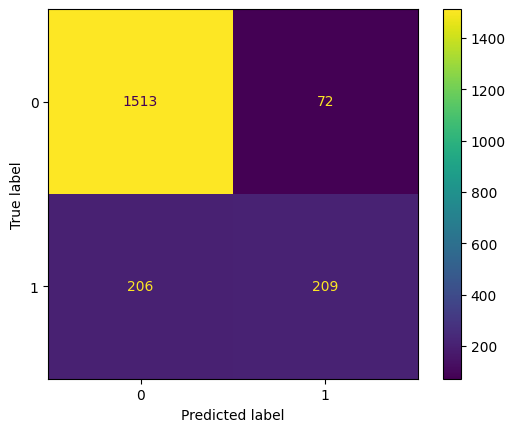

              precision    recall  f1-score   support

           1       0.88      0.95      0.92      1585
           0       0.74      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  classification_report, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show() 

print(classification_report(y_test, y_pred, target_names=['1', '0']))